# Restricted Boltzmann Machines Using TensorFlow


### Intialization

In [1]:
import urllib.request
with urllib.request.urlopen("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0120EN-SkillsNetwork/labs/Week4/data/utils.py") as url:
    response = url.read()
target = open('utils.py', 'w')
target.write(response.decode('utf-8'))
target.close()

In [2]:
# !pip install grpcio==1.24.3
# !pip install tensorflow==2.9.1
# !pip install pillow==8.1.0

In [3]:
import tensorflow as tf
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


if not tf.__version__ == '2.9.1':
    printmd('<<<<<!!!!! ERROR !!!! please upgrade to TensorFlow 2.9.1, or restart your Kernel (Kernel->Restart & Clear Output)>>>>>')

In [27]:
import tensorflow as tf
import numpy as np
from utils import tile_raster_images
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
v_bias = tf.Variable(tf.zeros([7]), tf.float32)
h_bias = tf.Variable(tf.zeros([2]), tf.float32)

In [6]:
W = tf.constant(np.random.normal(loc=0.0, scale=1.0, size=(7, 2)).astype(np.float32))

In [7]:
X = tf.constant([[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]], tf.float32)

v_state = X
print ("Input: ", v_state)

h_bias = tf.constant([0.1, 0.1])
print ("hb: ", h_bias)
print ("w: ", W)

# Calculate the probabilities of turning the hidden units on:
h_prob = tf.nn.sigmoid(tf.matmul(v_state, W) + h_bias)  #probabilities of the hidden units
print ("p(h|v): ", h_prob)

# Draw samples from the distribution:
h_state = tf.nn.relu(tf.sign(h_prob - tf.random.uniform(tf.shape(h_prob)))) #states
print ("h0 states:", h_state)

Input:  tf.Tensor([[1. 0. 0. 1. 0. 0. 0.]], shape=(1, 7), dtype=float32)
hb:  tf.Tensor([0.1 0.1], shape=(2,), dtype=float32)
w:  tf.Tensor(
[[ 0.02605978  1.4492663 ]
 [ 2.0192463   1.0281788 ]
 [ 0.19283019 -1.7377769 ]
 [ 1.0805223   0.09448285]
 [ 0.766634   -0.77645457]
 [ 1.1207454  -0.76204216]
 [ 0.42625412 -0.8315673 ]], shape=(7, 2), dtype=float32)
p(h|v):  tf.Tensor([[0.7696937  0.83804446]], shape=(1, 2), dtype=float32)
h0 states: tf.Tensor([[1. 1.]], shape=(1, 2), dtype=float32)


In [8]:
vb = tf.constant([0.1, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1])
print ("b: ", vb)
v_prob = tf.nn.sigmoid(tf.matmul(h_state, tf.transpose(W)) + vb)
print ("p(vi∣h): ", v_prob)
v_state = tf.nn.relu(tf.sign(v_prob - tf.random.uniform(tf.shape(v_prob))))
print ("v probability states: ", v_state)

b:  tf.Tensor([0.1 0.2 0.1 0.1 0.1 0.2 0.1], shape=(7,), dtype=float32)
p(vi∣h):  tf.Tensor(
[[0.8285416  0.9625805  0.19078049 0.7815983  0.5225296  0.63615245
  0.42425916]], shape=(1, 7), dtype=float32)
v probability states:  tf.Tensor([[1. 1. 0. 1. 0. 1. 0.]], shape=(1, 7), dtype=float32)


In [9]:
inp = X
print("input X:" , inp.numpy())

print("probablity vector:" , v_prob[0].numpy())
v_probability = 1

for elm, p in zip(inp[0],v_prob[0]) :
    if elm ==1:
        v_probability *= p
    else:
        v_probability *= (1-p)

print("probability of generating X: " , v_probability.numpy())

input X: [[1. 0. 0. 1. 0. 0. 0.]]
probablity vector: [0.8285416  0.9625805  0.19078049 0.7815983  0.5225296  0.63615245
 0.42425916]
probability of generating X:  0.00196135


### MNIST Dataset

In [10]:
#loading training and test data
mnist = tf.keras.datasets.mnist
(trX, trY), (teX, teY) = mnist.load_data()

# showing an example of the Flatten class and operation
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')
trX = flatten(trX/255.0)
trY = flatten(trY/255.0)

In [11]:
vb = tf.Variable(tf.zeros([784]), tf.float32)
hb = tf.Variable(tf.zeros([50]), tf.float32)

In [12]:
W = tf.Variable(tf.zeros([784,50]), tf.float32)

In [13]:
v0_state = tf.Variable(tf.zeros([784]), tf.float32)

#testing to see if the matrix product works
tf.matmul( [v0_state], W)

<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)>

In [14]:
#computing the hidden nodes probability vector and checking shape
h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
print("h0_state shape: " , tf.shape(h0_prob))

#defining a function to return only the generated hidden states
def hidden_layer(v0_state, W, hb):
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob)))) #sample_h_given_X
    return h0_state


h0_state = hidden_layer(v0_state, W, hb)
print("first 15 hidden states: ", h0_state[0][0:15])

h0_state shape:  tf.Tensor([ 1 50], shape=(2,), dtype=int32)
first 15 hidden states:  tf.Tensor([0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.], shape=(15,), dtype=float32)


In [15]:
def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb)
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob)))) #sample_v_given_h
    return v1_state[0]

v1_state = reconstructed_output(h0_state, W, vb)
print("hidden state shape: ", h0_state.shape)
print("v0 state shape:  ", v0_state.shape)
print("v1 state shape:  ", v1_state.shape)

hidden state shape:  (1, 50)
v0 state shape:   (784,)
v1 state shape:   (784,)


In [16]:
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0_state - v1_state))
print("error" , err.numpy())

error 0.47831634


### Model Training

In [17]:
h1_prob = tf.nn.sigmoid(tf.matmul([v1_state], W) + hb)
h1_state = tf.nn.relu(tf.sign(h1_prob - tf.random.uniform(tf.shape(h1_prob)))) #sample_h_given_X

In [18]:
print("error: ", error(v0_state, v1_state))

error:  tf.Tensor(0.47831634, shape=(), dtype=float32)


In [19]:
#Parameters
alpha = 0.01
epochs = 1
batchsize = 200
weights = []
errors = []
batch_number = 0
K = 1

#creating datasets
train_ds = \
    tf.data.Dataset.from_tensor_slices((trX, trY)).batch(batchsize)

for epoch in range(epochs):
    for batch_x, batch_y in train_ds:
        batch_number += 1
        for i_sample in range(batchsize):
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hb)
                v1_state = reconstructed_output(h0_state, W, vb)
                h1_state = hidden_layer(v1_state, W, hb)

                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                W = W + alpha * delta_W

                vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0)

                v0_state = v1_state

            if i_sample == batchsize-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % epoch,
                       "batch #: %i " % batch_number, "of %i" % int(60e3/batchsize),
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)



Epoch: 0 batch #: 1  of 300 sample #: 199 reconstruction error: 0.218545
Epoch: 0 batch #: 2  of 300 sample #: 199 reconstruction error: 0.203614
Epoch: 0 batch #: 3  of 300 sample #: 199 reconstruction error: 0.104368
Epoch: 0 batch #: 4  of 300 sample #: 199 reconstruction error: 0.129798
Epoch: 0 batch #: 5  of 300 sample #: 199 reconstruction error: 0.098652
Epoch: 0 batch #: 6  of 300 sample #: 199 reconstruction error: 0.158313
Epoch: 0 batch #: 7  of 300 sample #: 199 reconstruction error: 0.089329
Epoch: 0 batch #: 8  of 300 sample #: 199 reconstruction error: 0.105833
Epoch: 0 batch #: 9  of 300 sample #: 199 reconstruction error: 0.110606
Epoch: 0 batch #: 10  of 300 sample #: 199 reconstruction error: 0.197295
Epoch: 0 batch #: 11  of 300 sample #: 199 reconstruction error: 0.102750
Epoch: 0 batch #: 12  of 300 sample #: 199 reconstruction error: 0.132714
Epoch: 0 batch #: 13  of 300 sample #: 199 reconstruction error: 0.058276
Epoch: 0 batch #: 14  of 300 sample #: 199 reco

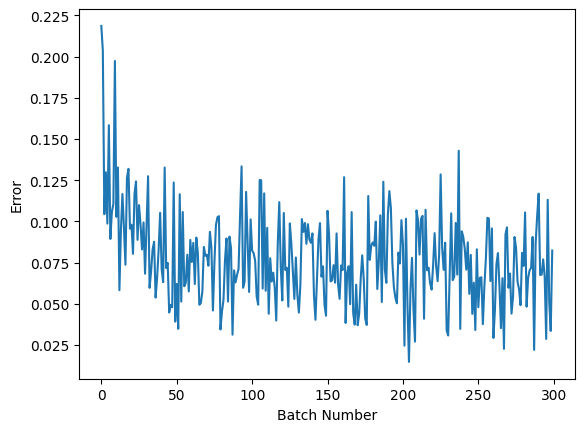

In [20]:
plt.plot(errors)
plt.xlabel("Batch Number")
plt.ylabel("Error")
plt.show()

In [21]:
print(W.numpy()) # a weight matrix of shape (50,784)

[[-0.17       -0.5199998  -0.42999986 ... -0.43999985 -0.31999996
  -0.4799998 ]
 [-0.24000004 -0.41999987 -0.40999988 ... -0.4899998  -0.26000002
  -0.3899999 ]
 [-0.22000003 -0.3899999  -0.36999992 ... -0.41999987 -0.27
  -0.5099998 ]
 ...
 [-0.20000002 -0.4899998  -0.40999988 ... -0.44999984 -0.22000003
  -0.5499998 ]
 [-0.23000003 -0.4999998  -0.3799999  ... -0.4799998  -0.30999997
  -0.46999982]
 [-0.23000003 -0.44999984 -0.36999992 ... -0.44999984 -0.30999997
  -0.45999983]]


<a id="ref5"></a>
<h3>Learned features</h3>


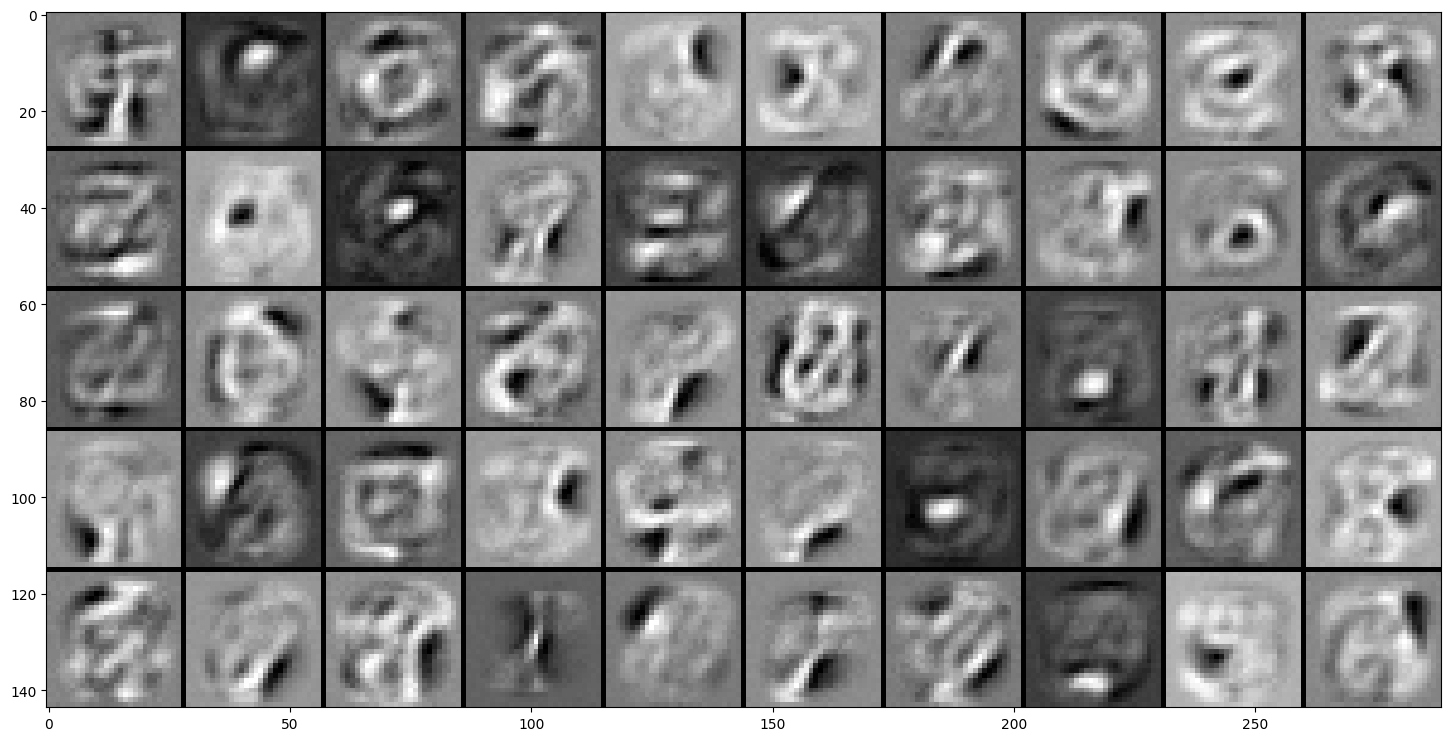

In [28]:
tile_raster_images(X=W.numpy().T, img_shape=(28, 28), tile_shape=(5, 10), tile_spacing=(1, 1))
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(X=W.numpy().T, img_shape=(28, 28) ,tile_shape=(5, 10), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

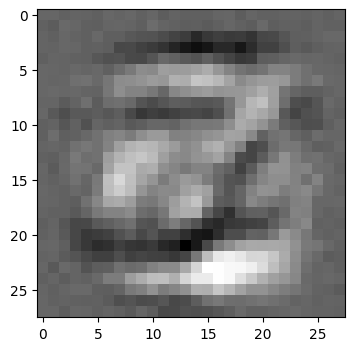

In [29]:
from PIL import Image
image = Image.fromarray(tile_raster_images(X =W.numpy().T[10:11], img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (4.0, 4.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

--2024-10-15 18:09:38--  https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Resolving ibm.box.com (ibm.box.com)... 74.112.186.157
Connecting to ibm.box.com (ibm.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg [following]
--2024-10-15 18:09:38--  https://ibm.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Reusing existing connection to ibm.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg [following]
--2024-10-15 18:09:39--  https://ibm.ent.box.com/public/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
Resolving ibm.ent.box.com (ibm.ent.box.com)... 74.112.186.157
Connecting to ibm.ent.box.com (ibm.ent.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b

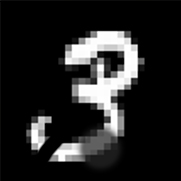

In [30]:
!wget -O destructed3.jpg  https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg
img = Image.open('destructed3.jpg')
img

In [31]:
# convert the image to a 1d numpy array
sample_case = np.array(img.convert('I').resize((28,28))).ravel().reshape((1, -1))/255.0

sample_case = tf.cast(sample_case, dtype=tf.float32)

In [32]:
hh0_p = tf.nn.sigmoid(tf.matmul(sample_case, W) + hb)
hh0_s = tf.round(hh0_p)

print("Probability nodes in hidden layer:" ,hh0_p)
print("activated nodes in hidden layer:" ,hh0_s)

# reconstruct
vv1_p = tf.nn.sigmoid(tf.matmul(hh0_s, tf.transpose(W)) + vb)

print(vv1_p)
#rec_prob = sess.run(vv1_p, feed_dict={ hh0_s: hh0_s_val, W: prv_w, vb: prv_vb})

Probability nodes in hidden layer: tf.Tensor(
[[5.27810001e-12 9.99955297e-01 9.33825449e-15 9.99174237e-01
  1.03693484e-17 9.99999404e-01 1.13567650e-04 1.30498754e-11
  1.96300776e-09 8.67007177e-09 5.40159285e-01 3.23910937e-02
  9.91765320e-01 8.44365422e-06 1.00000000e+00 3.14319623e-03
  9.58856106e-01 1.00000000e+00 1.87893448e-07 1.00000000e+00
  1.48345247e-01 1.13979792e-09 6.20435214e-18 9.98150229e-01
  1.07826144e-11 1.17103022e-03 3.80729492e-13 1.22360085e-04
  1.85978085e-01 1.99882972e-08 8.97963474e-12 1.25091628e-03
  9.99999821e-01 8.38480599e-04 3.61312027e-13 2.20223728e-09
  9.98296022e-01 9.99995768e-01 7.96721689e-03 1.22972927e-03
  9.99915719e-01 1.38313705e-02 6.98208436e-02 5.97795324e-15
  9.73623931e-01 2.99580572e-16 5.68566561e-01 1.00000000e+00
  9.99900818e-01 9.77239385e-02]], shape=(1, 50), dtype=float32)
activated nodes in hidden layer: tf.Tensor(
[[0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 1

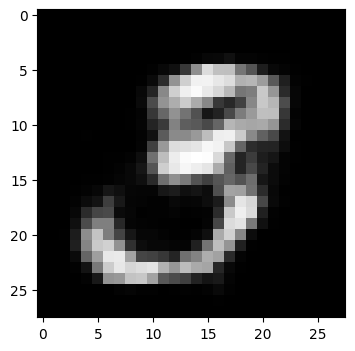

In [33]:
img = Image.fromarray(tile_raster_images(X=vv1_p.numpy(), img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
plt.rcParams['figure.figsize'] = (4.0, 4.0)
imgplot = plt.imshow(img)
imgplot.set_cmap('gray')